In [54]:
'''
Phase #1
1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
For example, look at:
a. Counts, averages
b. Distribution of the number of reviews across products
c. Distribution of the number of reviews per product
d. Distribution of reviews per user
e. Review lengths and outliers
f. Analyze lengths
g. Check for duplicates
'''

import pandas as pd

# Load
path = './data/Gift_Cards_5.json'
df = pd.read_json(path, lines=True)

# Head
print(df.head())

   overall  verified   reviewTime      reviewerID        asin  \
0        5      True  06 17, 2018  A31UBHTUUIFJUT  B004LLIKVU   
1        4      True  06 14, 2018  A2MN5JQMIY0FQ2  B004LLIKVU   
2        5      True   06 2, 2018  A25POI5IGGENPM  B004LLIKVU   
3        5      True  05 19, 2018  A2HYGTHB4LJ9FW  B004LLIKVU   
4        5      True  05 18, 2018   ACDG3M94UMZGJ  B004LLIKVU   

                     style      reviewerName  \
0  {'Gift Amount:': ' 50'}      john stoiber   
1  {'Gift Amount:': ' 50'}   Amazon Customer   
2  {'Gift Amount:': ' 50'}   Kindle Customer   
3  {'Gift Amount:': ' 50'}  Amante dei Gatti   
4  {'Gift Amount:': ' 50'}       Joan Freesh   

                                         reviewText  \
0                               Another great gift.   
1                         Gift card for my daughter   
2                                      Nice present   
3  My niece loved this birthday greeting/gift card.   
4                                   fine as a

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 0 to 2971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2972 non-null   int64  
 1   verified        2972 non-null   bool   
 2   reviewTime      2972 non-null   object 
 3   reviewerID      2972 non-null   object 
 4   asin            2972 non-null   object 
 5   style           864 non-null    object 
 6   reviewerName    2972 non-null   object 
 7   reviewText      2966 non-null   object 
 8   summary         2972 non-null   object 
 9   unixReviewTime  2972 non-null   int64  
 10  vote            208 non-null    float64
 11  image           12 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 281.5+ KB


In [56]:
# Check 'vote' values
print(df['vote'].value_counts())

vote
2.0     78
3.0     45
4.0     28
5.0     12
7.0     10
6.0      9
9.0      6
8.0      5
12.0     3
28.0     2
25.0     1
24.0     1
27.0     1
60.0     1
20.0     1
13.0     1
50.0     1
51.0     1
11.0     1
19.0     1
Name: count, dtype: int64


In [57]:
# CHeck 'image' values
print(df['image'].value_counts())

image
[https://images-na.ssl-images-amazon.com/images/I/71WmNNc3NvL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/61BiPOfnX7L._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/61o6wPy2K3L._SY88.jpg]    1
[https://images-na.ssl-images-amazon.com/images/I/71ZQty6s8RL._SY88.jpg]                                                                                                                                                    1
[https://images-na.ssl-images-amazon.com/images/I/71kH6fXdPbL._SY88.jpg]                                                                                                                                                    1
[https://images-na.ssl-images-amazon.com/images/I/51YWBCakowL._SY88.jpg]                                                                                                                                                    1
[https://images-na.ssl-images-amazon.com/images/I/71VY7xBh6lL._SY88.jpg, https://images-na.ssl-images-amaz

In [58]:
df['style'] = df['style'].astype(str)
df['reviewText'] = df['reviewText'].astype(str)

df['image_count'] = df['image'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['len_review'] = df['reviewText'].apply(lambda x: len(x))

In [59]:
# Convert boolean to int
boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)

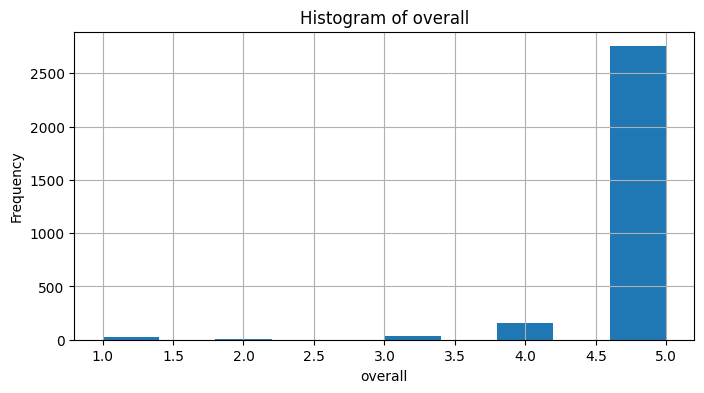

count    2972.000000
mean        4.885262
std         0.484660
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: overall, dtype: float64


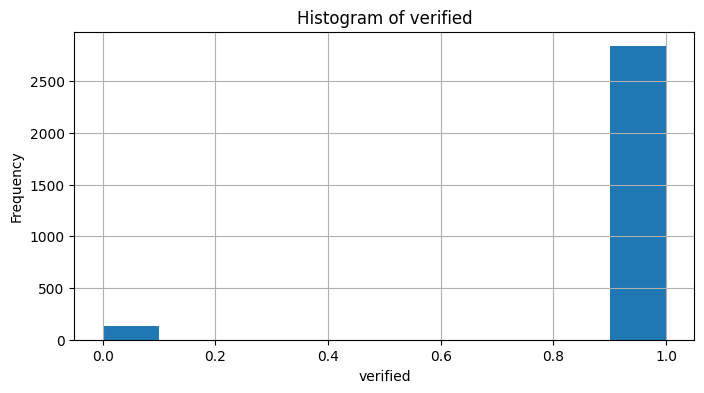

count    2972.000000
mean        0.954913
std         0.207531
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: verified, dtype: float64


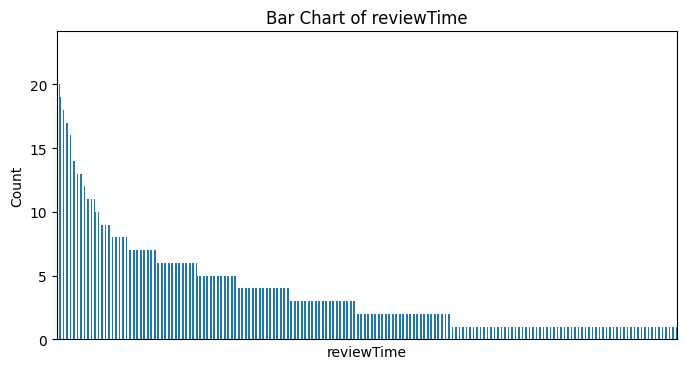

count            2972
unique            797
top       12 14, 2017
freq               23
Name: reviewTime, dtype: object


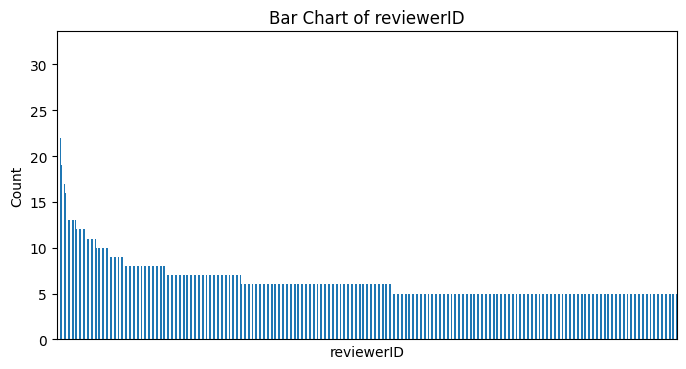

count               2972
unique               458
top       A1U1G73EI5IRZF
freq                  32
Name: reviewerID, dtype: object


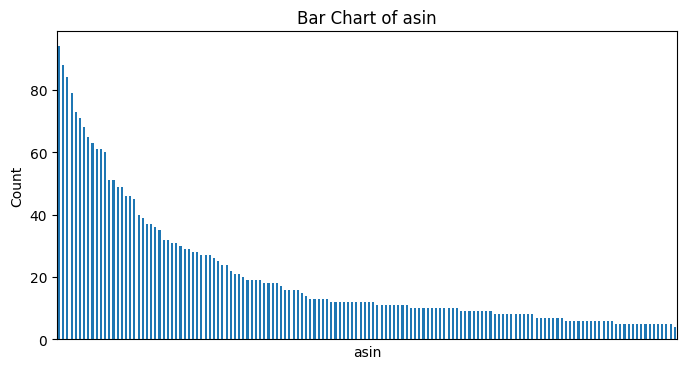

count           2972
unique           148
top       B00AR51Y5I
freq              94
Name: asin, dtype: object


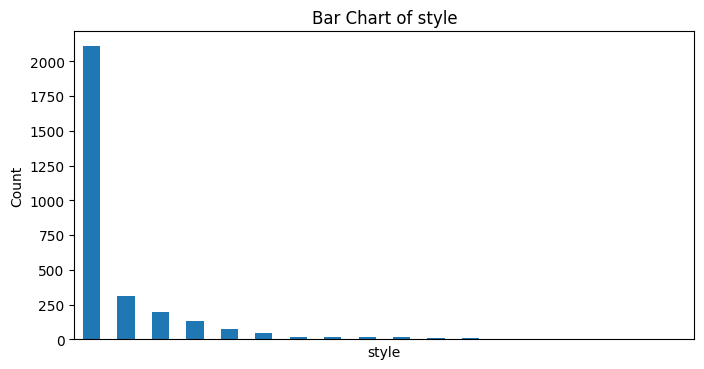

count     2972
unique      18
top        nan
freq      2108
Name: style, dtype: object


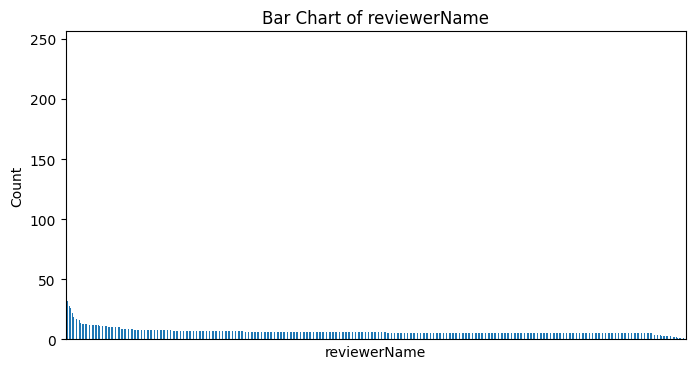

count                2972
unique                429
top       Amazon Customer
freq                  244
Name: reviewerName, dtype: object


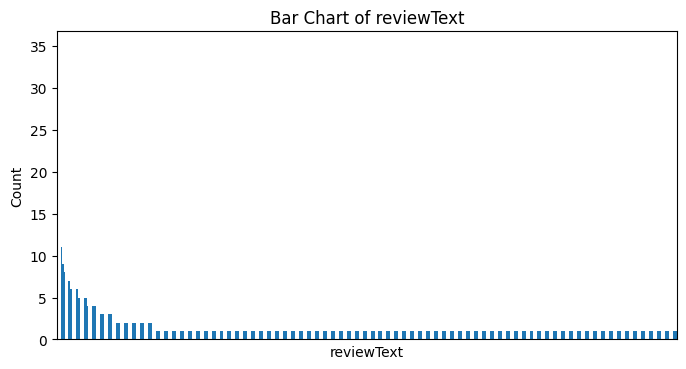

count      2972
unique     1938
top       great
freq         35
Name: reviewText, dtype: object


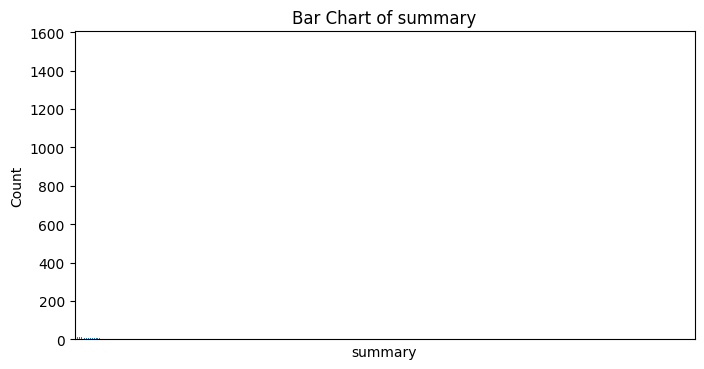

count           2972
unique           952
top       Five Stars
freq            1528
Name: summary, dtype: object


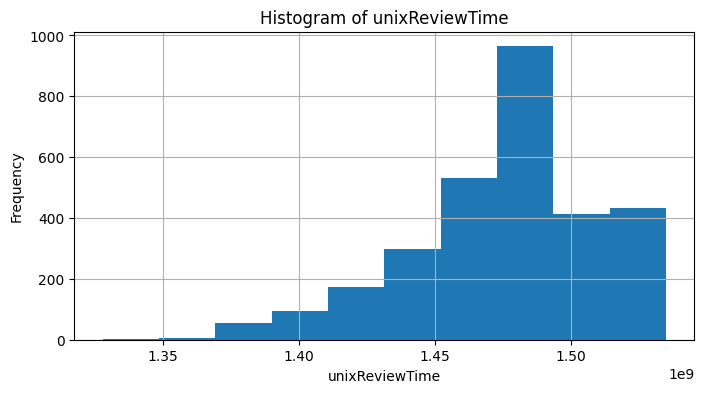

count    2.972000e+03
mean     1.476136e+09
std      3.379616e+07
min      1.327968e+09
25%      1.454890e+09
50%      1.482710e+09
75%      1.500271e+09
max      1.534896e+09
Name: unixReviewTime, dtype: float64


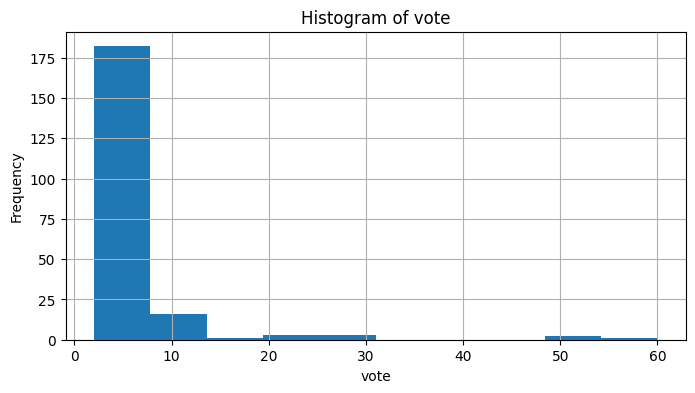

count    208.000000
mean       5.158654
std        7.366121
min        2.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       60.000000
Name: vote, dtype: float64


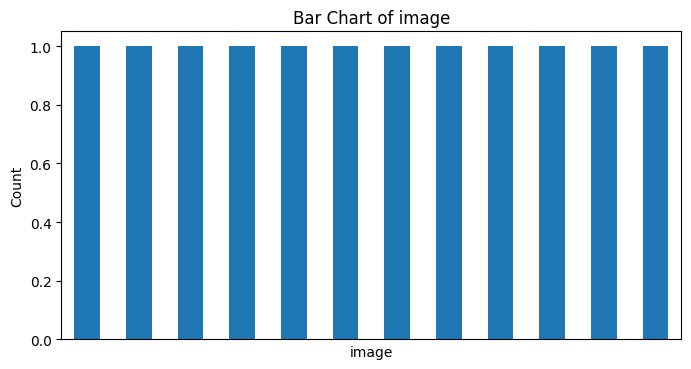

count                                                    12
unique                                                   12
top       [https://images-na.ssl-images-amazon.com/image...
freq                                                      1
Name: image, dtype: object


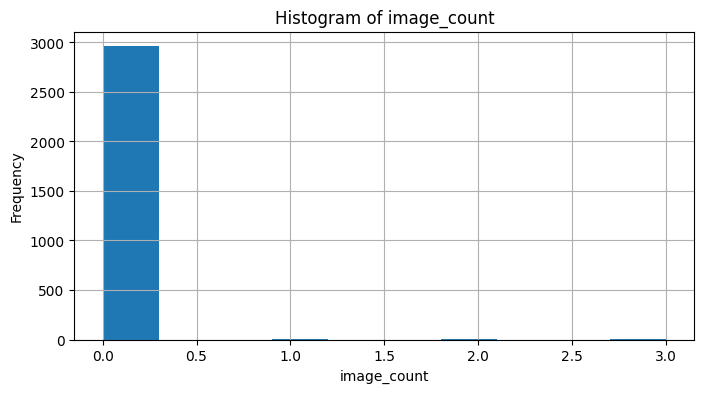

count    2972.000000
mean        0.006057
std         0.106805
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: image_count, dtype: float64


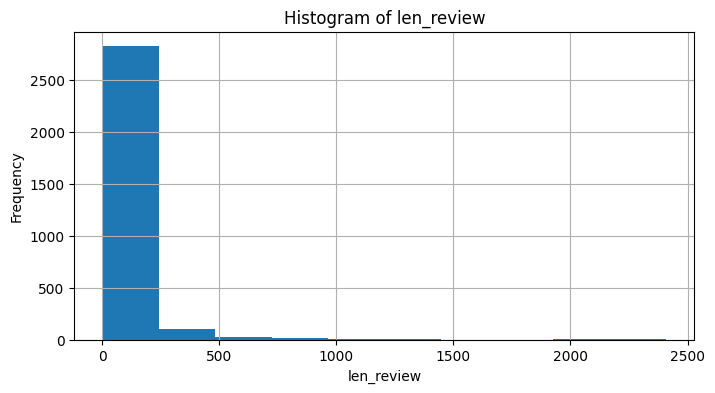

count    2972.000000
mean       67.337147
std       131.020103
min         2.000000
25%        12.000000
50%        29.000000
75%        72.000000
max      2409.000000
Name: len_review, dtype: float64


In [63]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(8, 4))
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        df[col].hist()
    # For non-numeric (categorical) data, generate a bar chart of value counts
    else:
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Chart of {col}')
        ucount = df[col].astype('str').nunique()
        if 10 < ucount:
            plt.xticks([])
        plt.ylabel('Count')
    plt.show()
    print(df[col].describe())

count    2972.000000
mean       67.337147
std       131.020103
min         2.000000
25%        12.000000
50%        29.000000
75%        72.000000
max      2409.000000
Name: len_review, dtype: float64

      overall                                         reviewText  len_review
162         5  Amazon gift cards are nothing new, and they ar...         645
174         5  I feel like Amazon should limit what can have ...         802
287         5  I feel like Amazon should limit what can have ...         802
398         5  I feel like Amazon should limit what can have ...         802
467         5  Amazon gift cards are nothing new, and they ar...         643
595         5  Amazon gift cards are nothing new, and they ar...         643
625         5  As you can see, it's very cute. I ordered diff...         890
636         5  This review is for the Amazon Gift Card (any a...        2409
646         5  Amazon gift cards are nothing new, and they ar...         643
679         1  Item was not 

<Axes: >

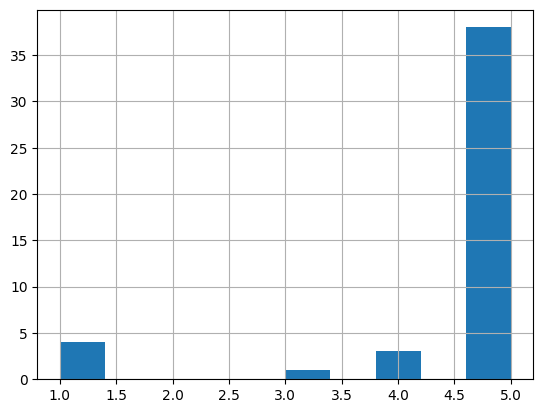

In [93]:
# 1.e. Check review lengths and outliers
print(df['len_review'].describe())
print()

# Outliers
outlier_long = df[df['len_review'] > 500]
print(outlier_long[
    [ 'overall', 'reviewText', 'len_review' ]
][:20])
print(outlier_long.describe())
outlier_long['overall'].hist()


In [82]:
print(outlier_long.iloc[1].reviewText)
print(outlier_long.iloc[2].reviewText)
print(outlier_long.iloc[3].reviewText)
print()
print(outlier_long.iloc[0].reviewText)
print(outlier_long.iloc[4].reviewText)
print(outlier_long.iloc[5].reviewText)
print(outlier_long.iloc[8].reviewText)

I feel like Amazon should limit what can have a product review. I mean seriously, it's a gift card. I guess if you received it and got a paper cut, you may want to warn people that there is that potential hazard. Or maybe you didn't get the correct design, to which I say again, it's a gift card. You're not getting married to it. You'll most likely toss it when you're done with it. I guess there is the chance that the card is not active when you receive it, but even still, that's not the cards fault, it is the card activator person's fault..we should be able to review them and their performance...'my card's activation seemed to be a little slow, even faulty at times. Maybe the card activator person needs more training.' For the record, my card worked, no paper cut, and the design was perfect!
I feel like Amazon should limit what can have a product review. I mean seriously, it's a gift card. I guess if you received it and got a paper cut, you may want to warn people that there is that po

In [90]:
'''
2. Text basic pre-processing:
a. Label your data based on the value of “rating of the product” i.e. as follows:
i. Ratings 4,5: Positive
ii. Rating 3: Neutral
iii. Ratings 1,2: Negative
'''
df['rating'] = df['overall'].apply(lambda x: 'Positive' if x > 3 else (
    'Neutral' if x == 3 else 'Negative'))
print(df['rating'].value_counts())

rating
Positive    2906
Negative      33
Neutral       33
Name: count, dtype: int64


In [ ]:
'''
Choose the appropriate columns for your sentiment analyzer. (Give this some
thought) and mention in your report why you chose each column.
'''